In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from config import api_key

from census import Census
from us import states

In [ ]:
#TK Code

In [ ]:
print ("I made changes to the file")
print("Added new print stmt")
print("last stmt")

In [ ]:
#TK code ends

In [ ]:
#Adam code

In [18]:
c = Census(api_key, year=2016)
raw_data = c.acs5.get(('NAME', 'B19013_001E', 'B19301_001E', 'B23025_003E',
                       'B23025_004E', 'B23025_005E', 'B01003_001E', "B01002_001E"), {'for':'state:*'})
census_df = pd.DataFrame(raw_data)
census_df = census_df.rename(columns = {'state': 'State#',
                          'NAME': 'State', 
                          'B01003_001E':'Total_population',
                          'B23025_003E':'Employable_civilians',
                          'B23025_004E':'Employed_civilians', 
                          'B23025_005E':'Unemployed_civilians', 
                          'B19013_001E':'Income',
                          'B19301_001E':'Income_per_capita',
                          "B01002_001E":'median age'
                          
    
})
census_df = census_df.sort_values('State#').reset_index(drop=True)
census_df.head()

,State,Income,Income_per_capita,Employable_civilians,Employed_civilians,Unemployed_civilians,Total_population,median age,State#
0,Alabama,44758.0,24736.0,2226504.0,2042025.0,184479.0,4841164.0,38.6,01
1,Alaska,74444.0,34191.0,384093.0,353954.0,30139.0,736855.0,33.6,02
2,Arizona,51340.0,26686.0,3129344.0,2879372.0,249972.0,6728577.0,37.1,04
3,Arkansas,42336.0,23401.0,1359742.0,1266552.0,93190.0,2968472.0,37.7,05
4,California,63783.0,31458.0,19260868.0,17577142.0,1683726.0,38654206.0,36.0,06


In [3]:
#Presidential file to dataframe called df
file = "Resources/1976-2016-president.tab"
df = pd.read_csv(file,sep='\t',header=(0))
#df.tail(40)

In [4]:
party = df.groupby("party")
party = party["candidatevotes"].sum()
party = pd.DataFrame(party.sort_values(ascending=False))
#party.head(40)

In [5]:
party_state = df.groupby(["party", "state"])
#party_state.sum()

In [6]:
#list just republican/democrat
parties = list(df["party"].unique())
parties
#would consider conservative, republican, and liberal party democrat. need to combine. 
combined_dem_rep = df.replace("conservative","republican")
combined_dem_rep = combined_dem_rep.replace("liberal party", "democrat")
combined_dem_rep = combined_dem_rep.replace("democratic-farmer-labor","democrat")
dems = combined_dem_rep.loc[combined_dem_rep["party"] == "democrat"]
repubs = combined_dem_rep.loc[combined_dem_rep["party"] == "republican"]
dems_repubs = dems.append(repubs)
state_count = dems_repubs.groupby(["party", "state"])
state_count = pd.DataFrame(state_count[["candidatevotes", "totalvotes"]].sum())
#state_count

In [7]:
dem_votes_by_state = dems[["state","candidatevotes","totalvotes"]]
dem_votes_by_state = dem_votes_by_state.groupby("state")
dem_votes_by_state = dem_votes_by_state.sum()
len(dem_votes_by_state)

repubs_votes_by_state = repubs[["state","candidatevotes","totalvotes"]]
repubs_votes_by_state = repubs_votes_by_state.groupby("state")
repubs_votes_by_state = repubs_votes_by_state.sum()
#repubs_votes_by_state

dems_merged_repubs = pd.merge(dem_votes_by_state, repubs_votes_by_state, on="state", how="outer")
dems_merged_repubs = dems_merged_repubs.rename(columns = {"candidatevotes_x":"democrat votes",
                                                         "candidatevotes_y": "republican votes"})
dems_merged_repubs = dems_merged_repubs[['democrat votes', 'republican votes']]
dems_merged_repubs["Difference%ofTotal"] = (dems_merged_repubs["democrat votes"] - dems_merged_repubs["republican votes"])/(dems_merged_repubs["democrat votes"]+dems_merged_repubs["republican votes"])
dems_merged_repubs = dems_merged_repubs.sort_values("Difference%ofTotal", ascending=False)
#dems_merged_repubs



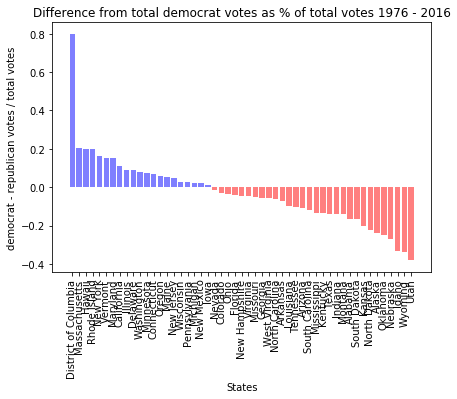

In [8]:
plots = list(dems_merged_repubs["Difference%ofTotal"])
x_axis = list(dems_merged_repubs.index)
colors = ["blue",
          "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",]
plt.bar(x_axis, plots, color=colors, alpha=0.5, align="center")
plt.tight_layout()
plt.xlabel("States")
plt.ylabel("democrat - republican votes / total votes")
plt.title("Difference from total democrat votes as % of total votes 1976 - 2016")
plt.xticks(rotation=90)
plt.show()


In [9]:
# 1980 - 1996
dems_repubs_1980_forward = dems_repubs.loc[dems_repubs["year"]>=1980]
dems_repubs_1980_1996 = dems_repubs_1980_forward.loc[dems_repubs_1980_forward["year"]<=1996]
#dems_repubs_1980_1996
dems_repubs_2000_2016 = dems_repubs_1980_forward.loc[dems_repubs_1980_forward["year"]>= 2000]
#dems_repubs_2000_2016

In [10]:
# plot for 1980 - 1996 

early_dems = dems_repubs_1980_1996.loc[dems_repubs_1980_1996["party"]=="democrat"]
early_dems = early_dems.groupby("state")
early_dems = pd.DataFrame(early_dems["candidatevotes"].sum())
#early_dems

early_repubs = dems_repubs_1980_1996.loc[dems_repubs_1980_1996["party"]=="republican"]
early_repubs = early_repubs.groupby("state")
early_repubs = pd.DataFrame(early_repubs["candidatevotes"].sum())
#early_repubs

early_merge = pd.merge(early_dems, early_repubs, how="outer", on="state")
early_merge = early_merge.rename(columns = {"candidatevotes_x": "democrat votes 1980-1996",
                                           "candidatevotes_y": "republican votes 1980-1996"})
early_merge["Difference%ofTotal"] = (early_merge["democrat votes 1980-1996"] - early_merge["republican votes 1980-1996"])/(early_merge["democrat votes 1980-1996"]+early_merge["republican votes 1980-1996"])
early_merge

late_dems = dems_repubs_2000_2016.loc[dems_repubs_2000_2016["party"]=="democrat"]
late_dems = late_dems.groupby("state")
late_dems = pd.DataFrame(late_dems["candidatevotes"].sum())
#late_dems

late_repubs = dems_repubs_2000_2016.loc[dems_repubs_2000_2016["party"]=="republican"]
late_repubs = late_repubs.groupby("state")
late_repubs = pd.DataFrame(late_repubs["candidatevotes"].sum())
#late_repubs

late_merge = pd.merge(late_dems, late_repubs, how="outer", on="state")
late_merge = late_merge.rename(columns = {"candidatevotes_x": "democrat votes 2000-2016",
                                         "candidatevotes_y": "republican votes 2000-2016"})
late_merge["Difference%ofTotal_late"] = (late_merge["democrat votes 2000-2016"] - late_merge["republican votes 2000-2016"])/(late_merge["democrat votes 2000-2016"]+late_merge["republican votes 2000-2016"])
late_merge

early_late_merge = pd.merge(early_merge, late_merge, how="outer", on="state")
early_late_merge["change"] = early_late_merge["Difference%ofTotal_late"] - early_late_merge["Difference%ofTotal"]
early_late_merge = early_late_merge.sort_values("change", ascending=False)
#negative indicates change towards republican - positive indicates change towards democrat

#early_late_merge


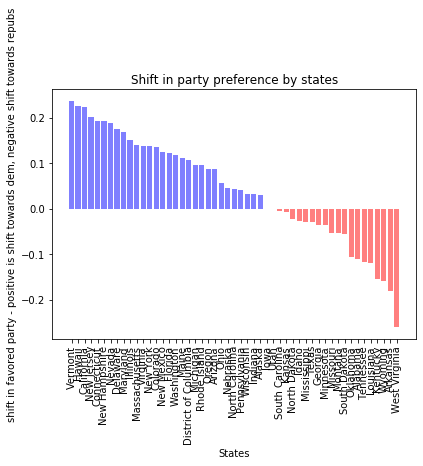

In [11]:
plots = list(early_late_merge["change"])
x_axis = list(early_late_merge.index)
colors = ["blue",
          "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "blue",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",
         "red",]
plt.bar(x_axis, plots, color=colors, alpha=0.5, align="center")
plt.tight_layout()
plt.xlabel("States")
plt.ylabel("shift in favored party - positive is shift towards dem, negative shift towards repubs")
plt.title("Shift in party preference by states")
plt.xticks(rotation=90)
plt.show()


In [17]:
early_late_merge.loc[early_late_merge["change"] > 0, "shift"] = "Democrat"
early_late_merge.loc[early_late_merge["change"] < 0, "shift"] = "Republican"
early_late_merge["absolute value"] = early_late_merge["change"].abs()
early_late_merge

,democrat votes 1980-1996,republican votes 1980-1996,Difference%ofTotal,democrat votes 2000-2016,republican votes 2000-2016,Difference%ofTotal_late,change,shift,absolute value
state,,,,,,,,,
Vermont,564943,523298,0.038268,930163,527996,0.275805,0.237536,Democrat,0.237536
Hawaii,859719,724552,0.085318,1336414,702464,0.310931,0.225613,Democrat,0.225613
California,21948855,22503875,-0.012486,37489234,24412804,0.211244,0.223730,Democrat,0.223730
New Jersey,6817606,7683343,-0.059702,10186766,7647404,0.142387,0.202090,Democrat,0.202090
Connecticut,3205971,3379750,-0.026387,4473930,3192455,0.167155,0.193542,Democrat,0.193542
New Hampshire,848113,1169262,-0.159192,1709772,1597038,0.034091,0.193283,Democrat,0.193283
Nevada,684181,924899,-0.149600,2281537,2108717,0.039364,0.188964,Democrat,0.188964
Delaware,582466,604456,-0.018527,1113866,811933,0.156783,0.175310,Democrat,0.175310
Maryland,4295178,3825315,0.057861,7463825,4713689,0.225837,0.167976,Democrat,0.167976


In [12]:
dems_repubs_minnesota = dems_repubs.loc[dems_repubs["state"] == "Minnesota"]
dems_repubs_minnesota = dems_repubs_minnesota.groupby("party").sum()
dems_repubs_minnesota = dems_repubs_minnesota[["candidatevotes","totalvotes"]]
#dems_repubs_minnesota

In [ ]:
#list(df["party"].unique())

In [ ]:
#just curious about write in candidates
just_write_in = df.loc[df["writein"] == True]
#just_write_in

In [ ]:
write_in_by_state = just_write_in.groupby("state")
write_in_by_state = pd.DataFrame(write_in_by_state["candidatevotes"].sum())
sorted_write_in_by_state = write_in_by_state["candidatevotes"].sort_values(ascending=False)
#sorted_write_in_by_state

In [ ]:
candidate = df.groupby("candidate")
temp = candidate.sum()
temp["% of totalvotes"] = temp["candidatevotes"]/temp["totalvotes"]
temp = pd.DataFrame(temp["% of totalvotes"].sort_values(ascending=False))
#temp.head(25)

In [ ]:
year_2016 = df.loc[df["year"]==2016]

by_candidate_2016 = year_2016.groupby("candidate")
total_votes = by_candidate_2016["candidatevotes"].sum().sort_values(ascending=False)
#total_votes

In [ ]:
year_2012 = df.loc[df["year"]==2012]

by_candidate_2012 = year_2012.groupby("candidate")
total_votes_2012 = by_candidate_2012["candidatevotes"].sum().sort_values(ascending=False)
#total_votes_2012

In [ ]:
#Adam code ends

In [ ]:
#Ryan code

In [ ]:
from census import Census
from us import states

c = Census(api_key, year=2018)

In [ ]:
* As only civilians are legel to vote, it would make sense to only pull the civilian employment data.
* The labor force is the sum of employed and unemployed persons
* Columns data to pull: 
* Income variables: 
    "income": B19013_001E, "income_per_capita": B19301_001E
* Employment variables:
    "employable civilians": B23025_003E, "employed civilians": B23025_004E, "unemployed civilians": B23025_005E
* Population variables: 
    "Total population": B01003_001E
* Poverty variables:
    "poverty people": "B17001_002E"
* Age variables:
    "median age": "B01002_001E" 

In [ ]:
raw_data = c.acs5.get(('NAME', 'B19013_001E', 'B19301_001E', 'B23025_003E',
                       'B23025_004E', 'B23025_005E', 'B01003_001E', "B01002_001E"), {'for':'state:*'})
df = pd.DataFrame(raw_data)
df = df.rename(columns = {'state': 'State#',
                          'NAME': 'State', 
                          'B01003_001E':'Total_population',
                          'B23025_003E':'Employable_civilians',
                          'B23025_004E':'Employed_civilians', 
                          'B23025_005E':'Unemployed_civilians', 
                          'B19013_001E':'Income',
                          'B19301_001E':'Income_per_capita',
                          "B01002_001E":'median age'
                          
    
})
df = df.sort_values('State#').reset_index(drop=True)
df

In [ ]:
#Ryan code ends

In [ ]:
#Connor code

In [ ]:
print("I made a change too!")

In [ ]:
#Connor code ends